# DSCI511 Final Project

- Shashwat Mann (ssm338@drexel.edu)
- Apurva Deshpande (aad368@drexel.edu)

## The Movie DataBase (TMDB)

The goal of this project is to extract data from themoviedb.org using an API and perform some Pre-Processing and Exploratory Data Analysis. We have extracted data from the Movie db.
Below is the documentation for the API to get a better understanding.
https://developer.themoviedb.org/reference/intro/getting-started

This project can be used by sociologists, in order to understand the culture of each decade by analyzing the data of the highest earning movie for each decade. It can also be used for a movie reccomendation system.

In [2]:
import csv
import requests
import json


# getting movies based on highest revenue by each year
def fetch_movies(api_key, year, page=1):
    url = f"https://api.themoviedb.org/3/discover/movie?api_key={api_key}&language=en-US&sort_by=revenue.desc&primary_release_year={year}&page={page}"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return json.loads(response.text)
    else:
        return None

# getting movie details based on fetch_movies
def fetch_movie_details(api_key, movie_id):
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US&append_to_response=keywords,credits"
    
    response = requests.get(url)
    
    if response.status_code == 200:
        return json.loads(response.text)
    else:
        return None

def format_movie_details(movie_details):
    # Extracting genres
    genres = [genre['name'] for genre in movie_details.get('genres', [])]

    # Extracting keywords
    keywords = [keyword['name'] for keyword in movie_details.get('keywords', {}).get('keywords', [])]

    # Extracting director(s)
    credits = movie_details.get('credits', {})
    directors = [crew['name'] for crew in credits.get('crew', []) if crew['job'] == 'Director']

    # Extracting top 5 cast members
    cast = [cast_member['name'] for cast_member in credits.get('cast', [])][:5]

    # Extracting production companies
    companies = [company['name'] for company in movie_details.get('production_companies', [])]

    # Formatting the extracted details into strings
    formatted_genres = ", ".join(genres)
    formatted_keywords = ", ".join(keywords)
    formatted_directors = ", ".join(directors)
    formatted_cast = ", ".join(cast)
    formatted_companies = ", ".join(companies)

    return formatted_genres, formatted_keywords, formatted_directors, formatted_cast, formatted_companies

if __name__ == "__main__":
    api_key = "4db440385bd18f327c0067576906154c"

    # Writing into CSV
    for year in range(1970, 2023):
        filename = f'box_office_hits_{year}.csv'
        with open(filename, 'w', newline='', encoding='utf-8') as csvfile:
            # writing rows into the CSV file
            csv_writer = csv.writer(csvfile, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
            
            # Defining the Header Row for the CSV file
            csv_writer.writerow(["Release Date", "Title", "Rating", "Budget", "Revenue", "Genres", "Keywords", "Director", "Cast", "Production Companies"])

        
            movies = fetch_movies(api_key, year)
            if movies and 'results' in movies:
                for movie in movies['results'][:20]:
                    movie_details = fetch_movie_details(api_key, movie['id'])
                    
                    if movie_details:
                        formatted_genres, formatted_keywords, formatted_directors, formatted_cast, formatted_companies = format_movie_details(movie_details)
                        csv_writer.writerow([movie_details['release_date'], movie_details['title'], movie_details['vote_average'], movie_details['budget'], movie_details['revenue'], formatted_genres, formatted_keywords, formatted_directors, formatted_cast, formatted_companies])

In the above code cell, we extracted data from each year since 1970 till 2022 and created a CSV file for each year. In the bottom cell, we are merging all of our csv files into one which would later be used for EDA

In [3]:
import pandas as pd
import os

def merge_csv_files(start_year, end_year, output_file):
    # List to hold data from all CSV files
    all_data = []

    for year in range(start_year, end_year + 1):
        filename = f'box_office_hits_{year}.csv'

        # Check if the file exists
        if os.path.exists(filename):
            # Read the CSV file and append to the list
            df = pd.read_csv(filename, encoding='ISO-8859-1')
            all_data.append(df)

    # Concatenate all dataframes into one
    merged_df = pd.concat(all_data, ignore_index=True)

    # Save the merged dataframe to a new CSV file
    merged_df.to_csv(output_file, index=False)

    return f"Merged CSV file created: {output_file}"

# Merge CSV files from 1970 to 2022
merge_csv_files(1970, 2022, 'merged_box_office_hits.csv')

'Merged CSV file created: merged_box_office_hits.csv'

## Data Pre-Processing and Cleaning

We will search for null values and duplicates and clean them if there are any. We will also add a couple of columns based on the existing ones.

In [4]:
df = pd.read_csv('merged_box_office_hits.csv')

As none of the null values are numerical and aren't that big, we will be filling those unknown values with 'unknown' instead

In [5]:
df.fillna('unknown', inplace=True)

We will be Adding Two more columns, 'Profit', 'Profit Percentage', and 'Decade' which would further be used for our EDA

In [6]:
df['Profit'] = df['Revenue'] - df ['Budget']
df['Profit %'] = ((df['Profit'])/df['Revenue'])*100

df['Decade'] = df['Release Date'].str.extract(r'(\d{3})0').astype(float) * 10

average_profit_by_decade = df.groupby('Decade')['Profit %'].mean()

## Exploratory Data Analysis

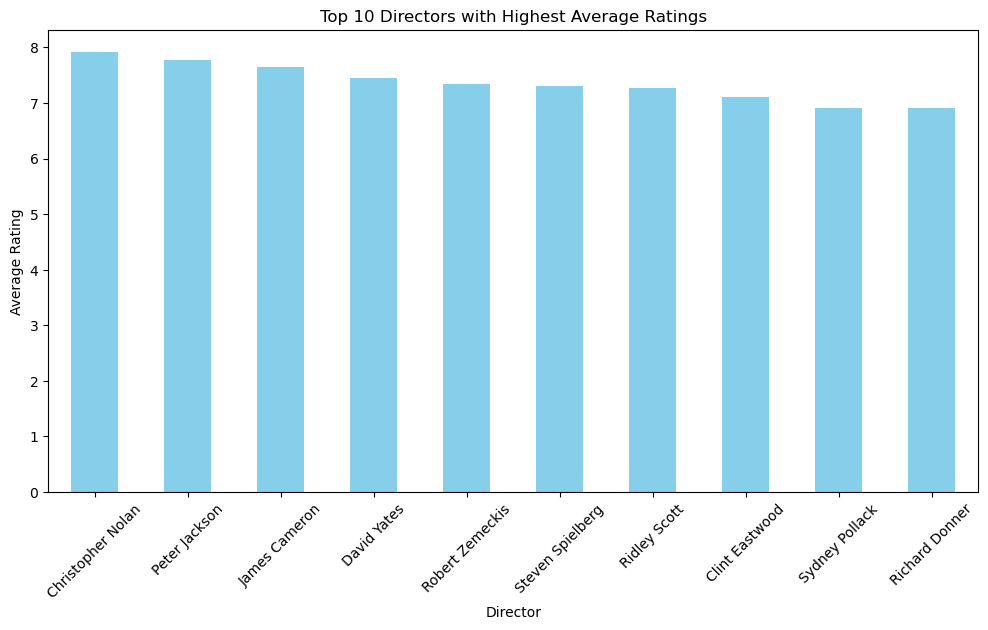

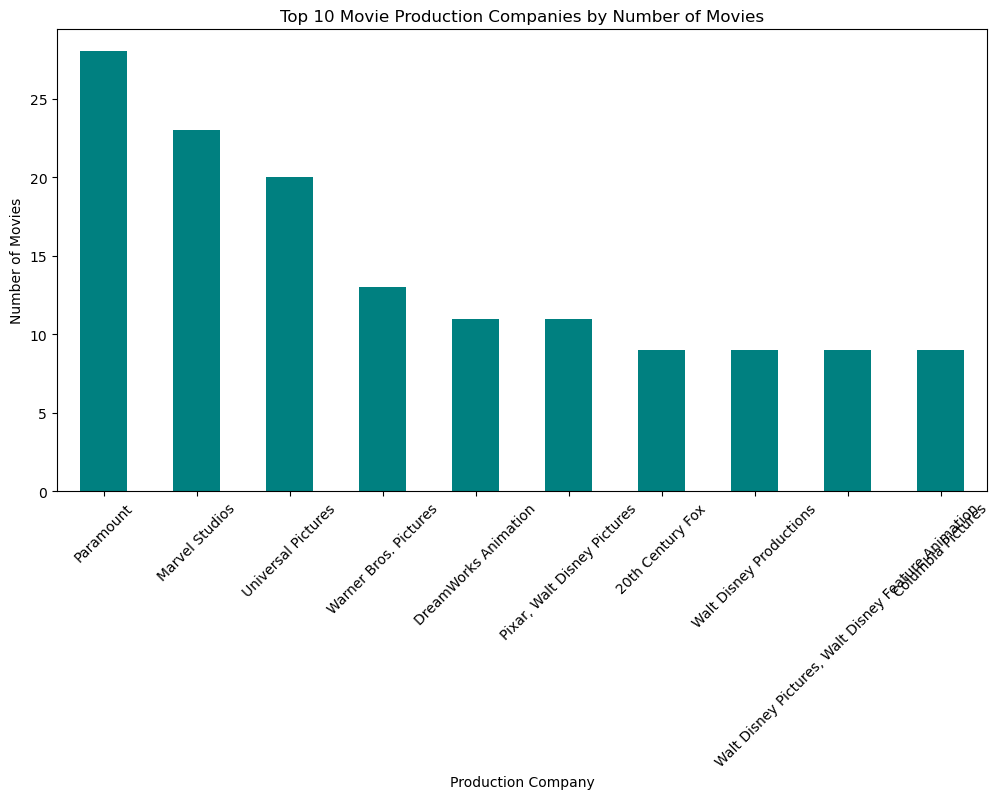

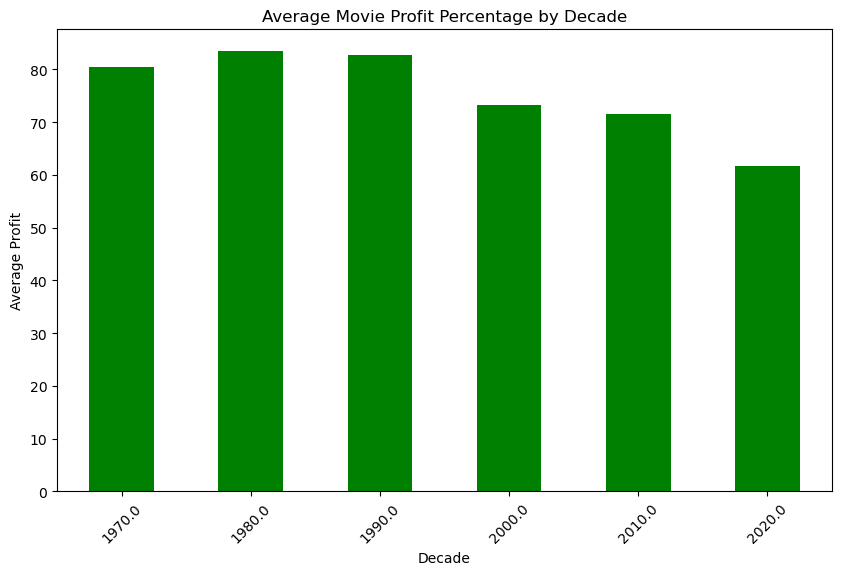

## Common Themes of these Movies

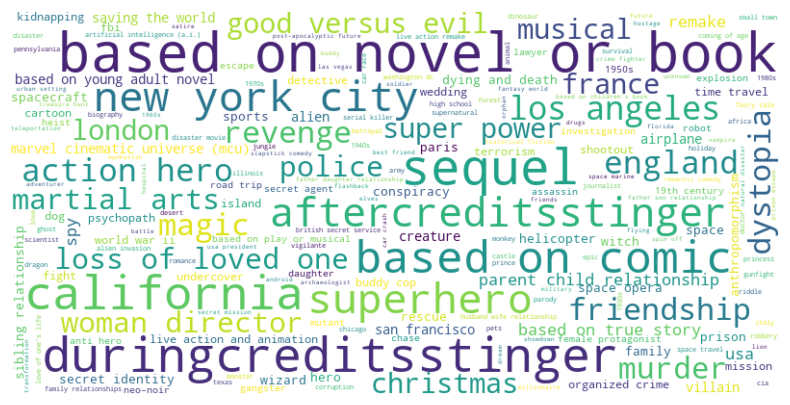

## Common Themes of the Highest Grossing Movies of the '70s

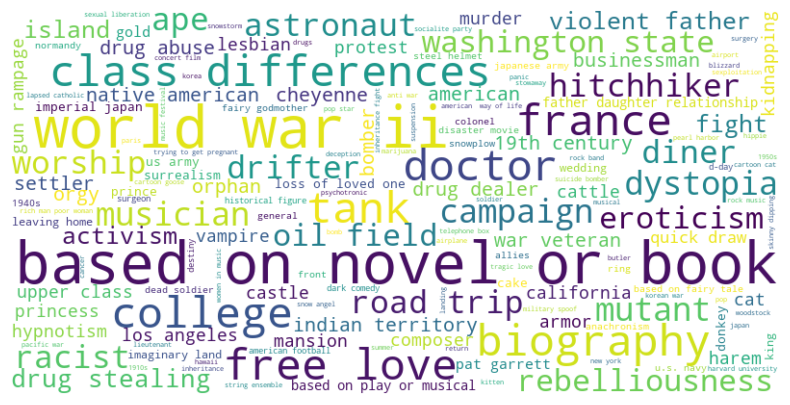

## Common Themes of the Highest Grossing Movies of the '80s

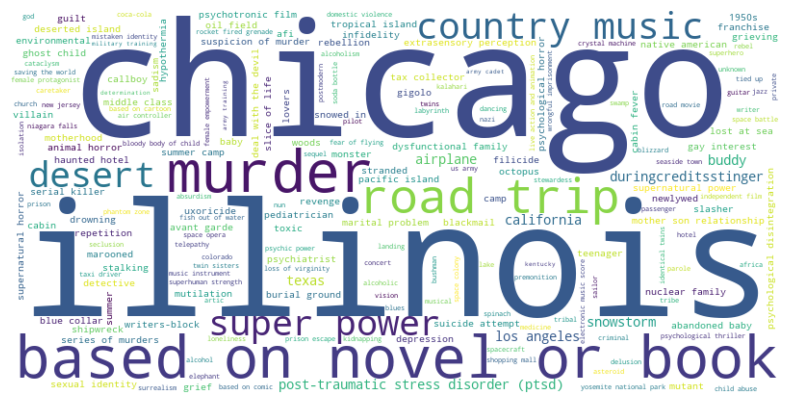

## Common Themes of the Highest Grossing Movies of the '90s

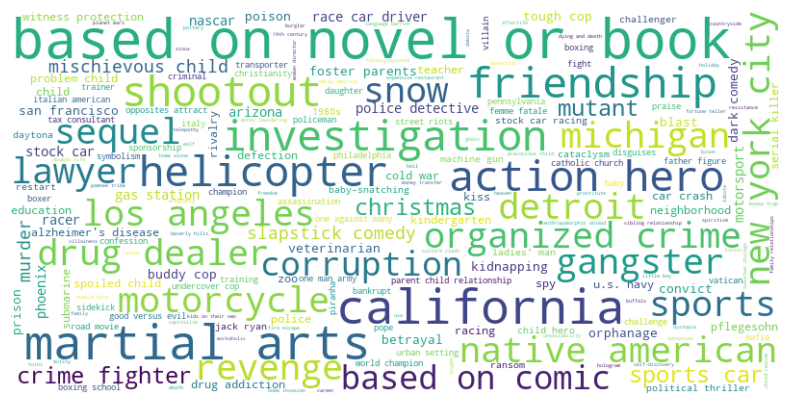

## Common Themes of the Highest Grossing Movies of the 2000s

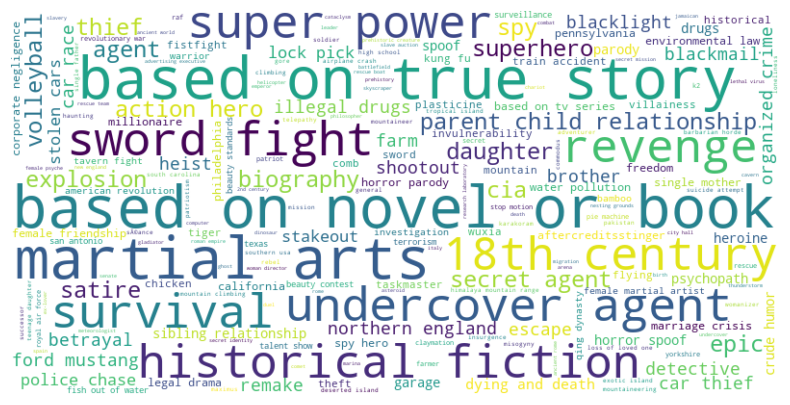

## Common Themes of the Highest Grossing Movies of the 2010s

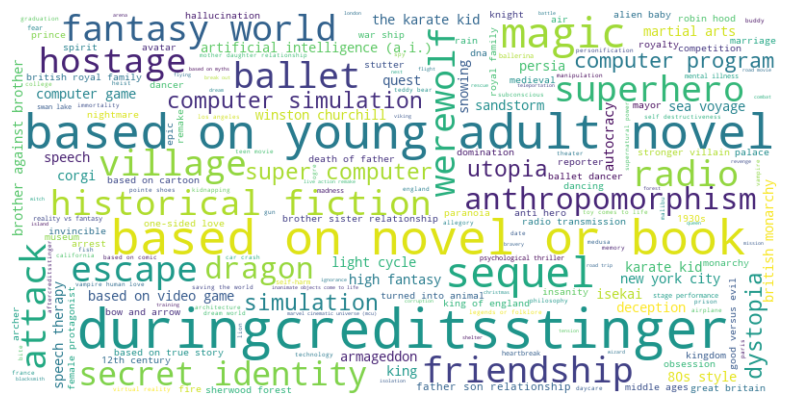

## Common Themes of the Highest Grossing Movies of the 2020s

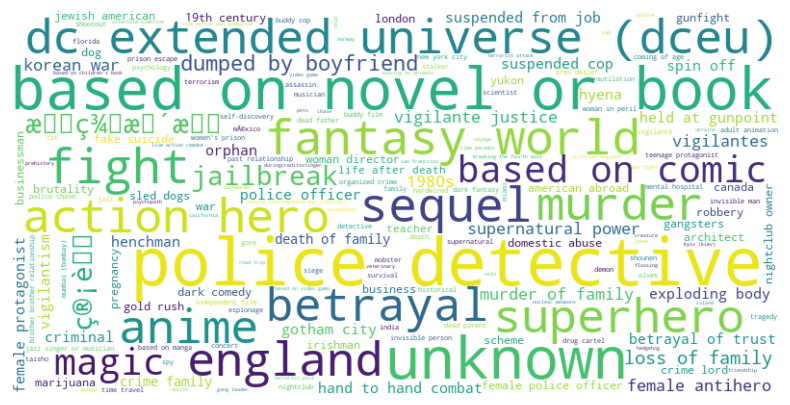